In [18]:
import pandas as pd
import h5py
from pathlib import Path
import logging
import logging.config
import yaml
import h5py
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import  array_to_img, img_to_array

import storage
import extraction

%matplotlib inline

Using TensorFlow backend.


In [2]:
def setupLogging():
    with open('../config/logConfig.yml', 'rt') as file:
        config = yaml.safe_load(file.read())
        logging.config.dictConfig(config)

In [3]:
setupLogging()

In [23]:
# Reads captions and images stored in the validate/train hdf5 files from start_index to end_index
def read_file(set_name, start_index, end_index): 
      
    file_nb = storage.get_file_numbers(start_index, end_index)
    print(file_nb[1])
    for nb in range(file_nb[0], file_nb[1]+1):
        file_path, lock_path = storage.get_path(set_name, nb)
        start_idx = nb * storage.get_file_size() if nb > file_nb[0] else start_index
        end_idx = (nb + 1) * storage.get_file_size() if nb < file_nb[1] else end_index
        print(start_idx)
        for idx in range(start_idx, end_idx):
            try:
                status, image, caption = storage.read_image(set_name, idx)  
                if (int(status) == 200):

                    print(image.shape)
                    print(caption)

                    x = image.reshape((1,) + image.shape)
                    print(x.shape)
                    plt.imshow(image)
                    plt.show()

            except KeyError:
                # Ignores files not found - probably an HHTP error when requesting the URL
                # Later - Keep count of the minning files to know the exact size of the dataset
                print("Missing index - image not found - probably an HHTP error when requesting the URL " + str(idx))
                continue 
   

    return

1
99999
(300, 300, 3)
the golden age of peace , prosperity , & advances in art & architecture .
(1, 300, 300, 3)


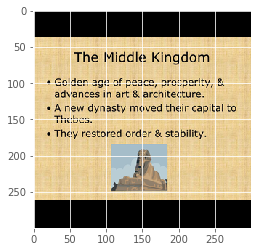

100000
(300, 300, 3)
soccer player during the match
(1, 300, 300, 3)


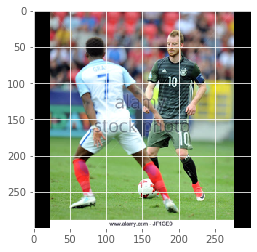

(300, 300, 3)
lp letter logo in a circle .
(1, 300, 300, 3)


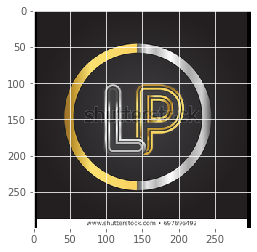

(300, 300, 3)
wild poppies and other wild flowers by the brick wall of person
(1, 300, 300, 3)


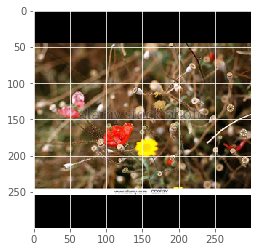

(300, 300, 3)
seamless patterned texture in the form of square tiles
(1, 300, 300, 3)


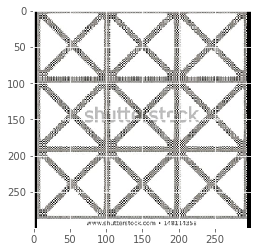

(300, 300, 3)
senior man practicing calligraphy in the study
(1, 300, 300, 3)


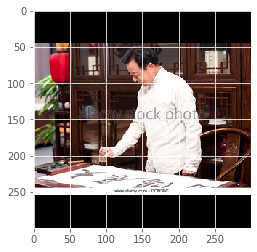

(300, 300, 3)
adult woman mounted on a bicycle with rucksack on the back for a shopping street in the city
(1, 300, 300, 3)


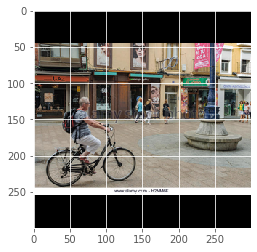

(300, 300, 3)
whale shark swims on a coral reef .
(1, 300, 300, 3)


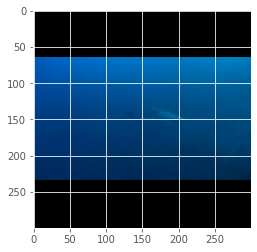

(300, 300, 3)
panning shot of a green field of wheat
(1, 300, 300, 3)


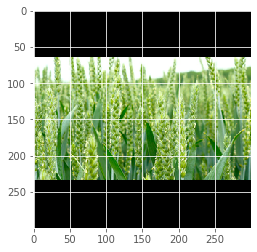

(300, 300, 3)
stone wall in the garden , the dry stack stone wall surrounds an elevated patio .
(1, 300, 300, 3)


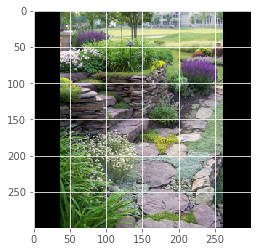

(300, 300, 3)
actor is photographed at festival for self assignment .
(1, 300, 300, 3)


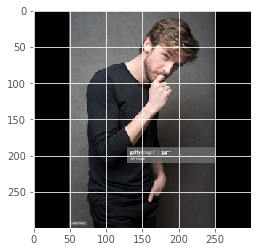

(300, 300, 3)
scenes with old houses in the field illustration
(1, 300, 300, 3)


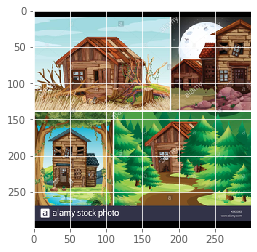

(300, 300, 3)
a bullfight the matador prepares for the final kill
(1, 300, 300, 3)


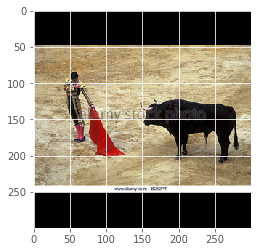

(300, 300, 3)
i have a giant picture with similar texture that will be included .
(1, 300, 300, 3)


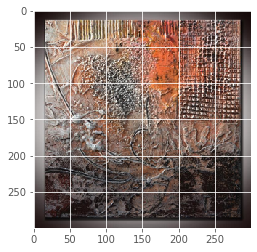

(300, 300, 3)
bald eagles congregate on the beach
(1, 300, 300, 3)


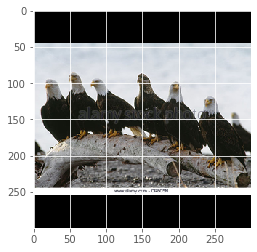

(300, 300, 3)
a night view looking towards neighborhood
(1, 300, 300, 3)


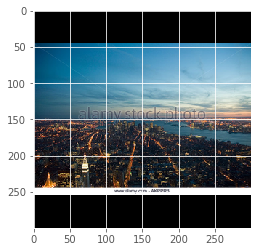

(300, 300, 3)
the view from your bedroom
(1, 300, 300, 3)


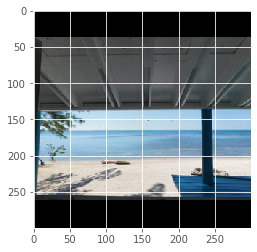

(300, 300, 3)
full length of pretty woman standing in the studio while using a digital tablet , isolated on white background
(1, 300, 300, 3)


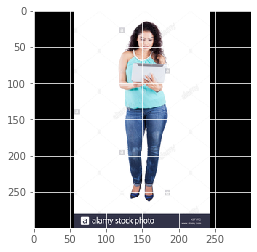

(300, 300, 3)
sculpture by sculpture artist silhouetted against interesting cloud formation in the sky
(1, 300, 300, 3)


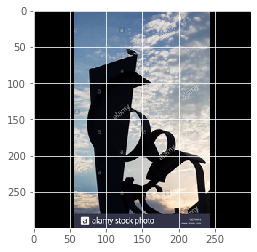

(300, 300, 3)
cricketer and person play football during a training session
(1, 300, 300, 3)


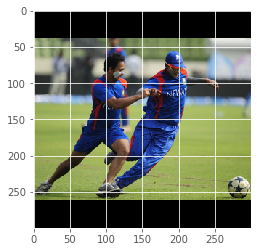

(300, 300, 3)
watch by wt author grey no hero
(1, 300, 300, 3)


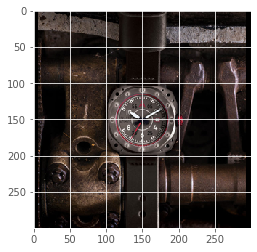

In [24]:
read_file("train", 99999, 100020)

   

In [9]:
# Reads status stored in the validate/train hdf5 files from start_index to end_index
def read_status(set_name, start_index, end_index): 
      
    file_nb = storage.get_file_numbers(start_index, end_index)
    statuslist = []

    for nb in range(file_nb[0], file_nb[1]+1):
        file_path, lock_path = storage.get_path(set_name, nb)
        start_idx = nb * storage.get_file_size() if nb > file_nb[0] else start_index
        end_idx = (nb + 1) * storage.get_file_size() if nb < file_nb[1] else end_index

        for idx in range(start_idx, end_idx):
            try:
                status, image, caption = storage.read_image(set_name, idx)  
                statuslist.append(int(status))

            except KeyError:
                # Ignores files not found - probably an HHTP error when requesting the URL
                # Later - Keep count of the minning files to know the exact size of the dataset
                print("Missing index - image not found - probably an HHTP error when requesting the URL " + str(idx))
                continue 
   
    return statuslist

200    175
500      5
404      5
403      4
Name: status, dtype: int64


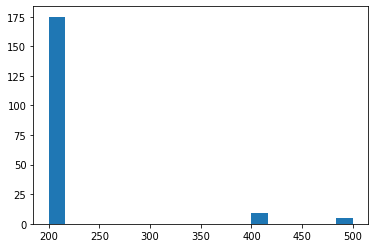

In [14]:
df['status'] = pd.DataFrame(read_status("train", 99910, 100099))
print(df['status'].value_counts())


plt.hist(df["status"], bins = 18)
plt.style.use('ggplot')
plt.show()